In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import pylab as pl

In [3]:
# download the data from http://nsidc.org/
url_north = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/NH_seaice_extent_final_v2.csv'
url_north2016 = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/NH_seaice_extent_nrt_v2.csv'
url_south = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/daily/data/SH_seaice_extent_final_v2.csv'
url_south2016 = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/daily/data/SH_seaice_extent_nrt_v2.csv'



In [4]:
north = pd.read_csv('NH_seaice_extent_final_v2.csv')
north2016 = pd.read_csv("NH_seaice_extent_nrt_v2.csv")

In [5]:
north = pd.read_csv('NH_seaice_extent_final_v2.csv')
north2016 = pd.read_csv("NH_seaice_extent_nrt_v2.csv")
year = north['Year'].as_matrix()  #could do the select in pandas but just to keep it simple
month = north['Month'].as_matrix()
day = north['Day'].as_matrix()
extent=north['Extent'].as_matrix() #in square kilometers
d = month*30 + day #quick shortcut for day of the year
d2016 = north2016['Month']*30 + north2016['Day']


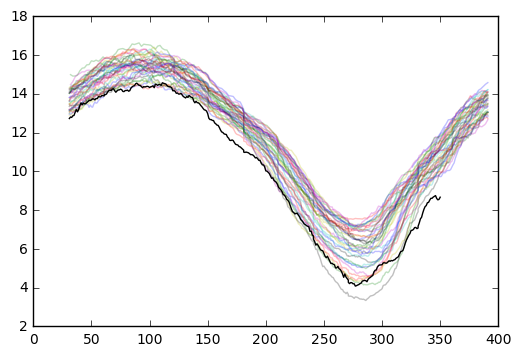

In [6]:

for y in range(1978, 2016):
    pl.plot(d[year==y], extent[year==y], alpha=0.25)
pl.plot(d2016, north2016['Extent'], color='black')

In [7]:
south = pd.read_csv('SH_seaice_extent_final_v2.csv')
south2016 = pd.read_csv("SH_seaice_extent_nrt_v2.csv")
syear = south['Year'].as_matrix()
smonth = south['Month'].as_matrix()
sday = south['Day'].as_matrix()
sextent=south['Extent'].as_matrix()
sd = month*30 + day #quick shortcut for day of the year
sd2016 = south2016['Month']*30 + south2016['Day']

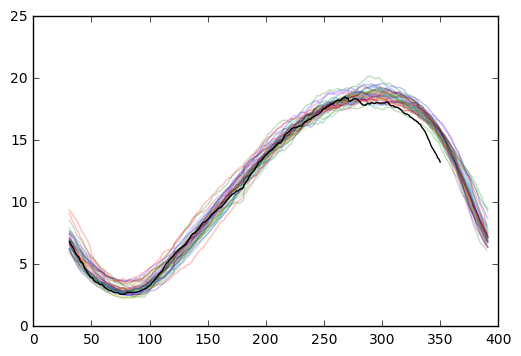

In [8]:
for y in range(1978, 2016):
    pl.plot(sd[year==y], sextent[year==y], alpha=0.25)
pl.plot(sd2016, south2016['Extent'], color='black')

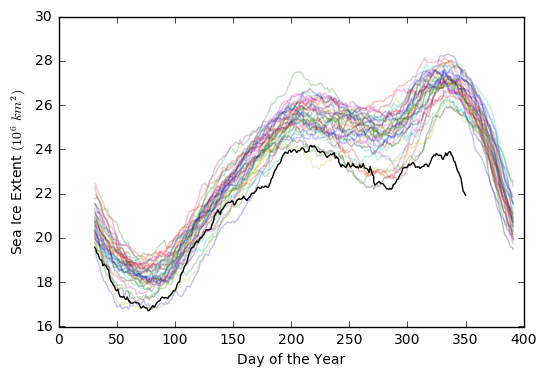

In [12]:
for y in range(1978, 2016):
    pl.plot(sd[year==y], sextent[year==y]+extent[year==y], alpha=0.25)
pl.plot(sd2016, south2016['Extent']+north2016['Extent'], color='black')
pl.xlabel('Day of the Year')
pl.ylabel('Sea Ice Extent $(10^6 \ km^2)$')

In [157]:
from astropy import units as u
from astropy import constants as c

In [109]:
area = 196e6 * u.imperial.mile**2

In [127]:
area = area.to(u.km**2)

In [111]:
# typical albedo of earth  0.3
# http://earthobservatory.nasa.gov/IOTD/view.php?id=84499

# typical albedo of ocean 0.06 
# typical albeda of sea ice 0.6
# https://nsidc.org/cryosphere/seaice/processes/albedo.html

In [121]:
global_extent = sextent[year==y]+extent[year==y]

In [122]:
global_extent *= 1e6

In [125]:
global_extent = global_extent * u.km**2

In [130]:
gm = global_extent.mean()

Let's create a very simple toy model of the earth.  We will assume that earth has a typical [albedo](https://www.skepticalscience.com/earth-albedo-effect-basic.htm) of 0.3.  Sea ice is very reflective (albedo's of 0.5-0.7).  The temperature of the earth is proportion to its albedo.   If the sea ice



In [140]:
(gm * 0.6 + (area - gm) * 0.286) / area

<Quantity 0.30021426072871815>

In [142]:
def earth_albedo(ice_area):
    return (0.286 * (area - ice_area) + 0.6*ice_area) / area

In [143]:
earth_albedo(gm)

<Quantity 0.30021426072871815>

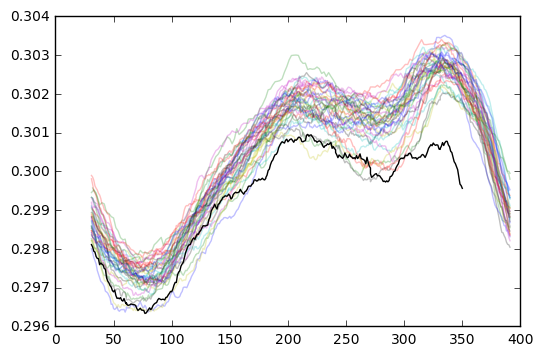

In [156]:
for y in range(1978, 2016):
    pl.plot(sd[year==y], earth_albedo((sextent[year==y]+extent[year==y])*1e6*u.km**2), alpha=0.25)
pl.plot(sd2016,  earth_albedo((south2016['Extent'].as_matrix()  +north2016['Extent'].as_matrix())*1e6*u.km**2), color='black')

In [213]:
S = 1361 * u.Watt/u.m**2
def temperature(ice_area):
    a = earth_albedo(ice_area)
    return (((1-a) * S/4/ c.sigma_sb )**0.25).to(u.K)

In [214]:
a = earth_albedo(gm)

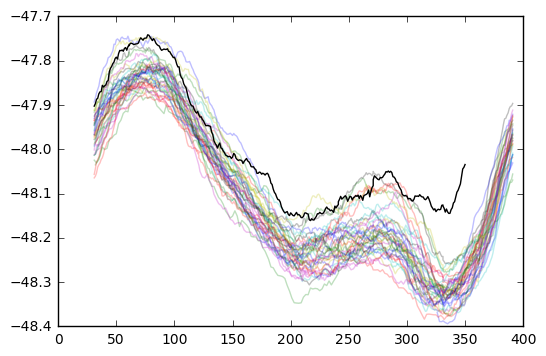

In [215]:
for y in range(1978, 2016):
    pl.plot(sd[year==y], temperature((sextent[year==y]+extent[year==y])*1e6*u.km**2)-t, alpha=0.25)
pl.plot(sd2016,  temperature((south2016['Extent'].as_matrix()  +north2016['Extent'].as_matrix())*1e6*u.km**2)-t, color='black')

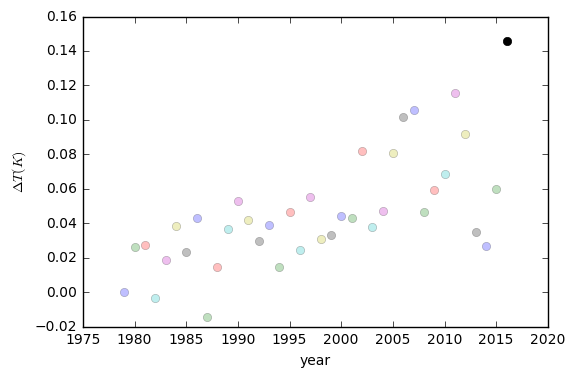

In [240]:
y_list = []
t_list = []
# normalize to 1979
t = temperature((sextent[year==1979]+extent[year==1979]).mean()* 1e6 * u.km**2)
for y in range(1979, 2016):
    s = (sextent[year==y]+extent[year==y]).mean() * 1e6 * u.km**2
    temp = temperature(s) - t
    y_list.append(y)
    t_list.append(t)
    pl.plot([y,], [temp.value], marker='o', alpha=0.25)
#pl.plot(y_list, t_list)
pl.plot(2016,  temperature(((south2016['Extent'].as_matrix()+north2016['Extent'].as_matrix())).mean()*1e6*u.km**2)-t, marker='o', color='black')
pl.xlabel('year')
pl.ylabel('$\Delta T (K)$')

In [220]:
temperature(0) - t

<Quantity 1.3425164513720915 K>

In [234]:
sextent[month==10].mean()

18.206958089668618

In [235]:
sextent[month==10].std()

0.52207203874861396

In [236]:
e = south2016['Extent'].as_matrix()
m = south2016['Month'].as_matrix()

In [237]:
e[m==10].mean()

17.388032258064516

In [230]:
(8.07-6.03)/1.3

1.5692307692307692

In [238]:
(17.38 - 18.20)/0.522


-1.5708812260536402